In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [3]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


## concate all the files

In [13]:
files = [file for file in os.listdir('./Sales_Data')]
    
all_data = pd.DataFrame()

for file in files:
    df = pd.read_csv('./Sales_Data/'+file)
    all_data = pd.concat([all_data, df])
    
    
all_data.to_csv("all_data.csv", index = False)

## clean the data

In [17]:
all_data = all_data.dropna()
all_data.isnull().sum()

all_data["Quantity Ordered"] = pd.to_numeric(all_data["Quantity Ordered"])
all_data["Price Each"] = pd.to_numeric(all_data["Price Each"])

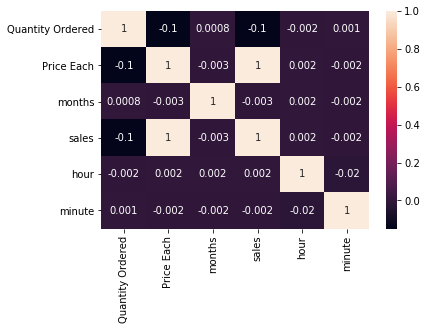

In [40]:
#checking corelation

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
corr = all_data.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, annot = True, fmt='.1g')

## month wise sales analysis

        Quantity Ordered    Price Each         sales
months                                              
1                  10903  1.811768e+06  1.822257e+06
2                  13449  2.188885e+06  2.202022e+06
3                  17005  2.791208e+06  2.807100e+06
4                  20558  3.367671e+06  3.390670e+06
5                  18667  3.135125e+06  3.152607e+06
6                  15253  2.562026e+06  2.577802e+06
7                  16072  2.632540e+06  2.647776e+06
8                  13448  2.230345e+06  2.244468e+06
9                  13109  2.084992e+06  2.097560e+06
10                 22703  3.715555e+06  3.736727e+06
11                 19798  3.180601e+06  3.199603e+06
12                 28114  4.588415e+06  4.613443e+06


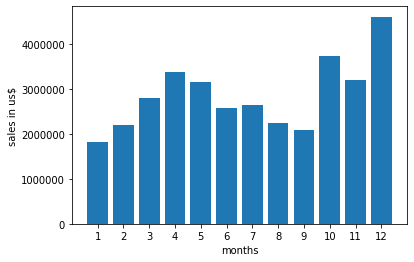

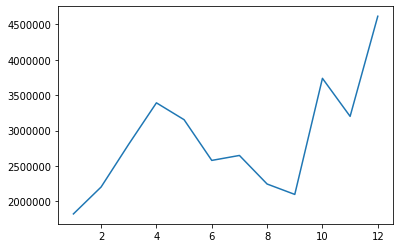

In [18]:
all_data['months'] = all_data["Order Date"].str[0:2]
all_data = all_data[all_data["Order Date"].str[0:2] != "Or"]
all_data["months"] = all_data["months"].astype('int32')

#creating sales column
all_data["sales"] = all_data["Quantity Ordered"]*all_data["Price Each"]

#values of sales
print(all_data.groupby("months").sum())

x = range(1,13)
y = all_data.groupby("months").sum()["sales"]
plt.bar(x,y)
plt.xticks(x)
plt.ylabel("sales in us$")
plt.xlabel("months")
plt.show()
plt.plot(x,y)


## city wise analysis

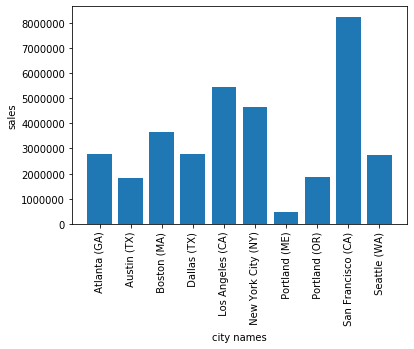

In [19]:
#get the city column 
city = all_data['Purchase Address'].apply(lambda x: x.split(",")[1])
state = all_data['Purchase Address'].apply(lambda x: x.split(",")[2].split(' ')[1])
all_data["city"] = city + " " +"(" + state + ")"
all_data.groupby("city").sum()['sales']
y = all_data.groupby("city")["sales"].sum()
x = [city for city, df in all_data.groupby("city")]
plt.xlabel("city names")
plt.ylabel("sales")
label = range(0,11)
plt.xticks(label, rotation = 'vertical')
plt.bar(x,y)
plt.show()

## Time at which to display the adds in order to maximize the customer buying products

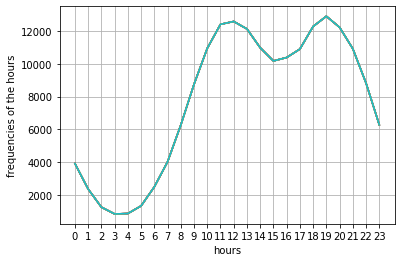

In [20]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

all_data["hour"] = all_data["Order Date"].dt.hour
all_data["minute"] = all_data["Order Date"].dt.minute

hours = [hour for hour, df in all_data.groupby("hour")]
sales = all_data.groupby("hour").count()
plt.xlabel("hours")
plt.ylabel("frequencies of the hours")
plt.xticks(hours)
plt.grid()

plt.plot(hours, sales)

#### HERE WE USED COUNT OF ORDER DATE WITH ALL HOUR OF DAY THE TIME WHICH HAS THE HIGHEST FREQUENCY IS THE IDEAL TIME TO SEND ADS. 
#### AS PER THE GRAPH WE CAN ALSO SEE THE PEAK TIME IS 11-12 WHICH IS BRUNCH AND 6-7 WHICH BREAK TIMES SO IT IS UNDERSTANDABLE

## which products are usually bought together

In [21]:
df = all_data[all_data['Order ID'].duplicated(keep=False)]

df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df2 = df[['Order ID', 'Grouped']].drop_duplicates()

F:\python\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [22]:

from itertools import combinations
from collections import Counter

count = Counter()

for row in df2['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key, value)


('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


#### HERE WE MADE A DUPLICATE OF ORDER ID TABLE AND GROUPED THE SAME ID'S TOGETHER  AS FRO THE OUTPUT WE CAN CLEARLY SEE THE MOST SOLD TOGETHER ITEM IS IS AN IPHONE AND A CABLE FOR  CHARGING WHICH IS TOTALLY CLEAR TO UNDERSTAND A GOOGLE PHONE WITH WIRED PHONES AS A CUSTOMER  BUYS A NEW PRODUCT IT IS LIKELY FOR HIM TO GET A XTRA CHARGER CABLE OR A HEADPHONES WE CAN GIVE THE WE CAN GIVE THE CUSTOMERS WHILE BUYING THESE PRODUCTS SOME ADDITIONAL OFFERS TO MAKE SURE THE CUSTOMERS BUYS THE EXTRA PRODUCT AS WELL

## what products are sold the most and why

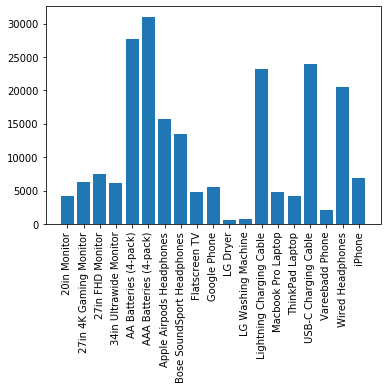

In [23]:
products = all_data.groupby("Product")
quantity_ordered = all_data.groupby("Product").sum()["Quantity Ordered"]
keys = [products for products, df in products]
plt.bar(keys,quantity_ordered)
plt.xticks(keys, rotation = 'vertical')
plt.show()


F:\python\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


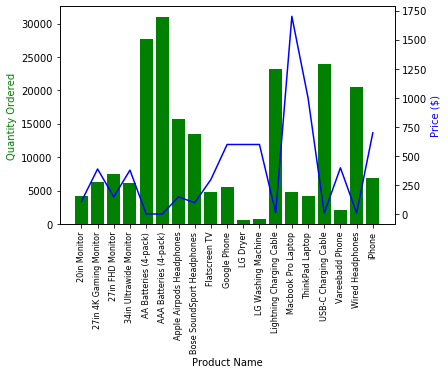

In [33]:
prices = all_data.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(keys, quantity_ordered, color='g')
ax2.plot(keys, prices, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(keys, rotation='vertical', size=8)

fig.show()

#### Here we plloted a bar graph of product wise sales and also a plotted a line graph of the mean price of the each product. What we can see is the the products with high sales are having less mean values that means they are comparitively cheap hence usually buy that. 
#### for ex. we buy extra pair of charging cables while buying a new phones but we dont buy an extra pair of tv or washing machine. An exception where the macbook and thinkpads mean price is high tho the sales are high it just because the demand of the product is high as there are more people looking for laptops for different purposes